In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot


In [2]:
df = pd.read_csv('watches.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Details,New price,Discount
0,0,fastrack wearables,unisex reflex curv pink strap silicone digital...,4495,31
1,1,fastrack wearables,unisex 40 mm reflex slay charcoal black dial s...,3995,33
2,2,titan,mens 52.50 x 11.70 x 44 mm octane black dial l...,3997,50
3,3,timex,men fashion green multifunction strap wrist watch,3596,20
4,4,police,mens grey leather multi-function watch - pl15...,7977,40


In [4]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [5]:
df.describe()

,New price,Discount
count,3975.000000,3975.000000
mean,7832.440000,25.120000
std,3152.416544,14.888968
min,1795.000000,0.000000
25%,4796.000000,20.000000
50%,7996.000000,30.000000
75%,10146.000000,31.000000
max,13995.000000,50.000000


In [6]:
df.drop(labels='Name',axis=1,inplace=True)
df.drop(labels='Details',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   New price  3975 non-null   int64
 1   Discount   3975 non-null   int64
dtypes: int64(2)
memory usage: 62.2 KB


In [8]:
df.describe()

,New price,Discount
count,3975.000000,3975.000000
mean,7832.440000,25.120000
std,3152.416544,14.888968
min,1795.000000,0.000000
25%,4796.000000,20.000000
50%,7996.000000,30.000000
75%,10146.000000,31.000000
max,13995.000000,50.000000


In [9]:
df.corr()

,New price,Discount
New price,1.000000,-0.487927
Discount,-0.487927,1.000000


In [10]:
y = np.array(df['New price'])
x = np.array(df['Discount'])

In [11]:
# _____________________________________"GRADIENT---DESCENT"_____________________________________________________________________
m = x[100] # weight
b = x[500] # bias
n = len(x)
slope_derivative = 0
intercept_derivative = 0
learning_rate = 0.5
for i in range(n):
    # calculating partial derivative
    #  -2x( y- (mx + b)) / n
    slope_derivative = (-2 * x[i]) * (y[i] - ((m * x[i]) + b)) / n
    # -2 (y - (mx + b)) / n
    intercept_derivative = (-2*(y[i] - ( m*x[i] + b)))
    m = m - learning_rate*slope_derivative
    b = b - learning_rate*intercept_derivative
print(m)
print(b)

-116.3818602193364
5072.775063105046


In [12]:
df.shape

(3975, 2)

In [13]:
n_rows = df.shape[0]

In [14]:
X=df['Discount'].to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df['New price'].to_numpy().reshape(n_rows,1)

In [15]:
X.shape, y.shape

((3975, 2), (3975, 1))

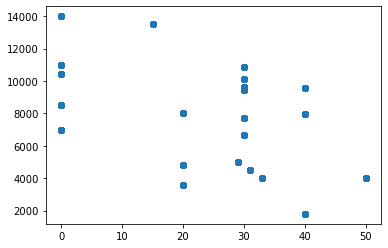

In [16]:
plt.scatter(x=df['Discount'], y=df['New price'])

In [25]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    m = len(y)
    J=0 # initialize loss to zero
    # reshape theta
    theta=theta.reshape(2,1)
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    return loss

In [18]:
compute_cost(X,y)

array([35641173.18])

In [19]:
theta = np.array([m,b])

In [20]:
theta


array([-116.38186022, 5072.77506311])

In [22]:
theta0_vals = np.linspace(-10,0,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 

In [24]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Cost function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()